### 사용할 모듈 import하기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### 차트 내 한글 깨짐 방지

In [2]:
# 사용자 운영체제 확인
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

### 경고창 무시하기

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

### csv파일 불러오기

In [4]:
df = pd.read_csv('../mydata.csv', encoding = 'cp949')

### 데이터프레임의 기초 정보 확인하기

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468834 entries, 0 to 468833
Data columns (total 44 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   개방자치단체코드   468834 non-null  int64  
 1   관리번호       468834 non-null  object 
 2   인허가일자      468834 non-null  int64  
 3   인허가취소일자    0 non-null       float64
 4   영업상태코드     468834 non-null  int64  
 5   영업상태명      468834 non-null  object 
 6   상세영업상태코드   468834 non-null  int64  
 7   상세영업상태명    468834 non-null  object 
 8   폐업일자       344666 non-null  float64
 9   휴업시작일자     0 non-null       float64
 10  휴업종료일자     0 non-null       float64
 11  재개업일자      0 non-null       float64
 12  전화번호       327760 non-null  object 
 13  소재지면적      434094 non-null  float64
 14  소재지우편번호    468589 non-null  float64
 15  지번주소       468597 non-null  object 
 16  도로명주소      217891 non-null  object 
 17  도로명우편번호    214362 non-null  float64
 18  사업장명       468833 non-null  object 
 19  최종수정일자     468834 non-n

### 데이터 전처리 작업하기
#### 1. 결측치 확인

In [6]:
df.isnull().sum()

개방자치단체코드          0
관리번호              0
인허가일자             0
인허가취소일자      468834
영업상태코드            0
영업상태명             0
상세영업상태코드          0
상세영업상태명           0
폐업일자         124168
휴업시작일자       468834
휴업종료일자       468834
재개업일자        468834
전화번호         141074
소재지면적         34740
소재지우편번호         245
지번주소            237
도로명주소        250943
도로명우편번호      254472
사업장명              1
최종수정일자            0
데이터갱신구분           0
데이터갱신일자           0
업태구분명            22
좌표정보(X)       24830
좌표정보(Y)       24830
위생업태명         60008
남성종사자수       205437
여성종사자수       203223
영업장주변구분명     226614
등급구분명        235453
급수시설구분명      179995
총인원          468834
본사종업원수       468736
공장사무직종업원수    468737
공장판매직종업원수    468737
공장생산직종업원수    468737
건물소유구분명      468833
보증액          468736
월세액          468736
다중이용업소여부      59992
시설총규모         59992
전통업소지정번호     467121
전통업소주된음식     467938
홈페이지         468834
dtype: int64

#### 2. 필요한 부분만 가져오기

#### 1) 폐업한 상점 데이터 가지고 오기, 필요없는 컬럼들 지우기

In [7]:
closed = df[df['상세영업상태명'] == '폐업']
closed = closed.drop(closed.columns[0:7], axis = 1)
closed = closed.drop(closed.columns[25:43], axis = 1)
closed.info()
# 지번주소 non-null한 데이터 수: 344524개, 도로명주소 non-null한 데이터 수: 95541개
## 지번주소에서 지역구를 추출하기 (데이터 수가 많으므로)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344672 entries, 18 to 468832
Data columns (total 25 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상세영업상태명   344672 non-null  object 
 1   폐업일자      344666 non-null  float64
 2   휴업시작일자    0 non-null       float64
 3   휴업종료일자    0 non-null       float64
 4   재개업일자     0 non-null       float64
 5   전화번호      268729 non-null  object 
 6   소재지면적     316044 non-null  float64
 7   소재지우편번호   344517 non-null  float64
 8   지번주소      344524 non-null  object 
 9   도로명주소     95541 non-null   object 
 10  도로명우편번호   92800 non-null   float64
 11  사업장명      344672 non-null  object 
 12  최종수정일자    344672 non-null  int64  
 13  데이터갱신구분   344672 non-null  object 
 14  데이터갱신일자   344672 non-null  object 
 15  업태구분명     344662 non-null  object 
 16  좌표정보(X)   321445 non-null  float64
 17  좌표정보(Y)   321445 non-null  float64
 18  위생업태명     327914 non-null  object 
 19  남성종사자수    234639 non-null  float64
 20  여성종

In [8]:
closed.head()

,상세영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,...,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,총인원
18,폐업,20210430.0,NaN,NaN,NaN,NaN,14.70,137891.0,서울특별시 서초구 양재동 120-10 1층,서울특별시 서초구 양재천로11길 12 1층 (양재동),...,기타,203159.960000,441451.870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,폐업,20200602.0,NaN,NaN,NaN,NaN,12.00,135829.0,서울특별시 강남구 논현동 226번지,서울특별시 강남구 봉은사로33길 34 지하1층 5-1호 (논현동),...,한식,203028.770828,445334.720543,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,폐업,20200602.0,NaN,NaN,NaN,NaN,110.40,137875.0,서울특별시 서초구 서초동 1576-4번지 1층 101호,서울특별시 서초구 서초중앙로 103 1층 101호 (서초동),...,기타,201159.654678,443187.071173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,폐업,20210806.0,NaN,NaN,NaN,NaN,50.00,152854.0,서울특별시 구로구 구로동 429-43 1층,서울특별시 구로구 구로동로28길 51 1층 (구로동),...,중국식,189942.919736,443201.373933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,폐업,20200602.0,NaN,NaN,NaN,02 356 5380,36.98,122923.0,서울특별시 은평구 응암동 126-5번지 1층 102호,서울특별시 은평구 응암로21가길 9-11 1층 102호 (응암동),...,기타,192540.370555,454712.243026,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2) 상호별 상세 주소 가져오기

In [9]:
# 지번주소 컬럼에서 등록된 상호의 지역구 추출하기

closed = closed.dropna(subset = ['지번주소'])
# 지번주소 컬럼 내 결측치를 제거하기

def goo(x):
    if x[0] == "서":
        res = x.split(' ')[1]
        return res
    else:
        return None
# 지역구 추출하는 함수
## 데이터 내 '서울특별시 ~' 로 시작하는 주소가 없는 경우 Null처리하는 함수 정의

closed['지역(구)'] = closed['지번주소'].apply(goo)

closed['업태구분명'].isnull().sum()
# 데이터 내 업태구분명 컬럼에서도 결측치가 존재함

10

In [10]:
closed = closed.dropna(subset = ['업태구분명'])
closed['업태구분명'].isnull().sum()
# 업태구분명 컬럼의 결측치 모두 제거

0

In [11]:
closed = closed.dropna(subset = ['폐업일자'])
closed['폐업일자'].isnull().sum()
# 폐업일자 컬럼의 결측치가 제거됐는지 확인

0

In [12]:
closed
# 데이터프레임 작업 결과 확인

,상세영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,...,좌표정보(X),좌표정보(Y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,총인원,지역(구)
18,폐업,20210430.0,NaN,NaN,NaN,NaN,14.70,137891.0,서울특별시 서초구 양재동 120-10 1층,서울특별시 서초구 양재천로11길 12 1층 (양재동),...,203159.960000,441451.870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서초구
50,폐업,20200602.0,NaN,NaN,NaN,NaN,12.00,135829.0,서울특별시 강남구 논현동 226번지,서울특별시 강남구 봉은사로33길 34 지하1층 5-1호 (논현동),...,203028.770828,445334.720543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구
52,폐업,20200602.0,NaN,NaN,NaN,NaN,110.40,137875.0,서울특별시 서초구 서초동 1576-4번지 1층 101호,서울특별시 서초구 서초중앙로 103 1층 101호 (서초동),...,201159.654678,443187.071173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서초구
58,폐업,20210806.0,NaN,NaN,NaN,NaN,50.00,152854.0,서울특별시 구로구 구로동 429-43 1층,서울특별시 구로구 구로동로28길 51 1층 (구로동),...,189942.919736,443201.373933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,구로구
60,폐업,20200602.0,NaN,NaN,NaN,02 356 5380,36.98,122923.0,서울특별시 은평구 응암동 126-5번지 1층 102호,서울특별시 은평구 응암로21가길 9-11 1층 102호 (응암동),...,192540.370555,454712.243026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,은평구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468824,폐업,20211001.0,NaN,NaN,NaN,3638655,20.00,121859.0,서울특별시 마포구 아현동 327-25 외1필지(327-30) 1층,서울특별시 마포구 굴레방로 27 (아현동외1필지(327-30) 1층),...,195978.443677,450483.826642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,마포구
468826,폐업,20211001.0,NaN,NaN,NaN,NaN,12.71,131813.0,서울특별시 중랑구 면목동 461-22,서울특별시 중랑구 사가정로53길 22 (면목동),...,207818.133366,453264.407318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,중랑구
468828,폐업,20211001.0,NaN,NaN,NaN,02 5393777,31.73,135881.0,서울특별시 강남구 삼성동 165-3 지상1층,서울특별시 강남구 봉은사로112길 12 (삼성동지상1층),...,205672.610257,445766.009934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구
468830,폐업,20211001.0,NaN,NaN,NaN,02,85.15,157883.0,서울특별시 강서구 화곡동 360-22 (지상 1층),서울특별시 강서구 월정로 148-2 1층 (화곡동 1동),...,185537.541538,447796.211241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강서구


In [13]:
closed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344508 entries, 18 to 468832
Data columns (total 26 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상세영업상태명   344508 non-null  object 
 1   폐업일자      344508 non-null  float64
 2   휴업시작일자    0 non-null       float64
 3   휴업종료일자    0 non-null       float64
 4   재개업일자     0 non-null       float64
 5   전화번호      268672 non-null  object 
 6   소재지면적     315886 non-null  float64
 7   소재지우편번호   344501 non-null  float64
 8   지번주소      344508 non-null  object 
 9   도로명주소     95384 non-null   object 
 10  도로명우편번호   92654 non-null   float64
 11  사업장명      344508 non-null  object 
 12  최종수정일자    344508 non-null  int64  
 13  데이터갱신구분   344508 non-null  object 
 14  데이터갱신일자   344508 non-null  object 
 15  업태구분명     344508 non-null  object 
 16  좌표정보(X)   321283 non-null  float64
 17  좌표정보(Y)   321283 non-null  float64
 18  위생업태명     327775 non-null  object 
 19  남성종사자수    234625 non-null  float64
 20  여성종

In [14]:
closed = closed.drop(closed.columns[18:25], axis = 1)
# 분석에 필요없는 컬럼들 다시 제거

In [15]:
closed.isnull().sum()
# 결측치가 없는지 재확인

상세영업상태명         0
폐업일자            0
휴업시작일자     344508
휴업종료일자     344508
재개업일자      344508
전화번호        75836
소재지면적       28622
소재지우편번호         7
지번주소            0
도로명주소      249124
도로명우편번호    251854
사업장명            0
최종수정일자          0
데이터갱신구분         0
데이터갱신일자         0
업태구분명           0
좌표정보(X)     23225
좌표정보(Y)     23225
지역(구)           0
dtype: int64

#### 3) 폐업일자가 2018.02.20 이후인 데이터만 추출하기

In [16]:
closed.head()

,상세영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),지역(구)
18,폐업,20210430.0,NaN,NaN,NaN,NaN,14.70,137891.0,서울특별시 서초구 양재동 120-10 1층,서울특별시 서초구 양재천로11길 12 1층 (양재동),6754.0,커피할루카,20210430172324,U,2020-12-05 00:02:00.0,기타,203159.960000,441451.870000,서초구
50,폐업,20200602.0,NaN,NaN,NaN,NaN,12.00,135829.0,서울특별시 강남구 논현동 226번지,서울특별시 강남구 봉은사로33길 34 지하1층 5-1호 (논현동),6107.0,김경자 3代 진국,20200602105117,U,2019-12-06 00:04:00.0,한식,203028.770828,445334.720543,강남구
52,폐업,20200602.0,NaN,NaN,NaN,NaN,110.40,137875.0,서울특별시 서초구 서초동 1576-4번지 1층 101호,서울특별시 서초구 서초중앙로 103 1층 101호 (서초동),6650.0,미스터피자 교대점,20200602164648,U,2019-12-06 00:04:00.0,기타,201159.654678,443187.071173,서초구
58,폐업,20210806.0,NaN,NaN,NaN,NaN,50.00,152854.0,서울특별시 구로구 구로동 429-43 1층,서울특별시 구로구 구로동로28길 51 1층 (구로동),8307.0,투보가요리집,20210806110231,U,2020-12-08 00:08:00.0,중국식,189942.919736,443201.373933,구로구
60,폐업,20200602.0,NaN,NaN,NaN,02 356 5380,36.98,122923.0,서울특별시 은평구 응암동 126-5번지 1층 102호,서울특별시 은평구 응암로21가길 9-11 1층 102호 (응암동),3456.0,근린커피 브루잉,20200602151013,U,2019-12-06 00:04:00.0,기타,192540.370555,454712.243026,은평구


In [17]:
closed = closed[closed['폐업일자'] >= 20180220]
closed

,상세영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),지역(구)
18,폐업,20210430.0,NaN,NaN,NaN,NaN,14.70,137891.0,서울특별시 서초구 양재동 120-10 1층,서울특별시 서초구 양재천로11길 12 1층 (양재동),6754.0,커피할루카,20210430172324,U,2020-12-05 00:02:00.0,기타,203159.960000,441451.870000,서초구
50,폐업,20200602.0,NaN,NaN,NaN,NaN,12.00,135829.0,서울특별시 강남구 논현동 226번지,서울특별시 강남구 봉은사로33길 34 지하1층 5-1호 (논현동),6107.0,김경자 3代 진국,20200602105117,U,2019-12-06 00:04:00.0,한식,203028.770828,445334.720543,강남구
52,폐업,20200602.0,NaN,NaN,NaN,NaN,110.40,137875.0,서울특별시 서초구 서초동 1576-4번지 1층 101호,서울특별시 서초구 서초중앙로 103 1층 101호 (서초동),6650.0,미스터피자 교대점,20200602164648,U,2019-12-06 00:04:00.0,기타,201159.654678,443187.071173,서초구
58,폐업,20210806.0,NaN,NaN,NaN,NaN,50.00,152854.0,서울특별시 구로구 구로동 429-43 1층,서울특별시 구로구 구로동로28길 51 1층 (구로동),8307.0,투보가요리집,20210806110231,U,2020-12-08 00:08:00.0,중국식,189942.919736,443201.373933,구로구
60,폐업,20200602.0,NaN,NaN,NaN,02 356 5380,36.98,122923.0,서울특별시 은평구 응암동 126-5번지 1층 102호,서울특별시 은평구 응암로21가길 9-11 1층 102호 (응암동),3456.0,근린커피 브루잉,20200602151013,U,2019-12-06 00:04:00.0,기타,192540.370555,454712.243026,은평구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468824,폐업,20211001.0,NaN,NaN,NaN,3638655,20.00,121859.0,서울특별시 마포구 아현동 327-25 외1필지(327-30) 1층,서울특별시 마포구 굴레방로 27 (아현동외1필지(327-30) 1층),4116.0,민반장뼈다귀해장국,20211001101043,U,2020-10-31 00:03:00.0,한식,195978.443677,450483.826642,마포구
468826,폐업,20211001.0,NaN,NaN,NaN,NaN,12.71,131813.0,서울특별시 중랑구 면목동 461-22,서울특별시 중랑구 사가정로53길 22 (면목동),2213.0,소문난구이곱창,20211001112723,U,2020-10-31 00:03:00.0,정종/대포집/소주방,207818.133366,453264.407318,중랑구
468828,폐업,20211001.0,NaN,NaN,NaN,02 5393777,31.73,135881.0,서울특별시 강남구 삼성동 165-3 지상1층,서울특별시 강남구 봉은사로112길 12 (삼성동지상1층),6172.0,오대리국수,20211001150221,U,2020-10-31 00:03:00.0,한식,205672.610257,445766.009934,강남구
468830,폐업,20211001.0,NaN,NaN,NaN,02,85.15,157883.0,서울특별시 강서구 화곡동 360-22 (지상 1층),서울특별시 강서구 월정로 148-2 1층 (화곡동 1동),7766.0,홀까닭,20211001111810,U,2020-10-31 00:03:00.0,통닭(치킨),185537.541538,447796.211241,강서구


In [18]:
print(pd.unique(closed['휴업시작일자']))
print(pd.unique(closed['휴업종료일자']))
print(pd.unique(closed['재개업일자']))
print(pd.unique(closed['전화번호']))

[nan]
[nan]
[nan]
[nan '02  356 5380' '02 9622110' ... '3638655' '02 5393777' '02 4203055']


In [19]:
# 컬럼들 확인한 결과 내용이 전부 NaN이고 전화번호컬럼은 필요없으므로 제거
# 중복되는 정보인 도로명주소 외에 우편번호, 최종수정일자, 데이터갱신구분 컬럼 또한 필요없으므로 제거
closed = closed.drop(columns = ['휴업시작일자', '휴업종료일자', '재개업일자', '전화번호', '도로명주소', '소재지우편번호', '도로명우편번호', '최종수정일자', '데이터갱신구분', '데이터갱신일자'], axis = 1)
closed

,상세영업상태명,폐업일자,소재지면적,지번주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),지역(구)
18,폐업,20210430.0,14.70,서울특별시 서초구 양재동 120-10 1층,커피할루카,기타,203159.960000,441451.870000,서초구
50,폐업,20200602.0,12.00,서울특별시 강남구 논현동 226번지,김경자 3代 진국,한식,203028.770828,445334.720543,강남구
52,폐업,20200602.0,110.40,서울특별시 서초구 서초동 1576-4번지 1층 101호,미스터피자 교대점,기타,201159.654678,443187.071173,서초구
58,폐업,20210806.0,50.00,서울특별시 구로구 구로동 429-43 1층,투보가요리집,중국식,189942.919736,443201.373933,구로구
60,폐업,20200602.0,36.98,서울특별시 은평구 응암동 126-5번지 1층 102호,근린커피 브루잉,기타,192540.370555,454712.243026,은평구
...,...,...,...,...,...,...,...,...,...
468824,폐업,20211001.0,20.00,서울특별시 마포구 아현동 327-25 외1필지(327-30) 1층,민반장뼈다귀해장국,한식,195978.443677,450483.826642,마포구
468826,폐업,20211001.0,12.71,서울특별시 중랑구 면목동 461-22,소문난구이곱창,정종/대포집/소주방,207818.133366,453264.407318,중랑구
468828,폐업,20211001.0,31.73,서울특별시 강남구 삼성동 165-3 지상1층,오대리국수,한식,205672.610257,445766.009934,강남구
468830,폐업,20211001.0,85.15,서울특별시 강서구 화곡동 360-22 (지상 1층),홀까닭,통닭(치킨),185537.541538,447796.211241,강서구


In [20]:
closed = closed.sort_values(ascending = True, by = '폐업일자')
closed

,상세영업상태명,폐업일자,소재지면적,지번주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),지역(구)
33642,폐업,20180220.0,62.08,서울특별시 중구 신당동 403-40번지,제주똥돼지,한식,200953.849253,450954.803167,중구
269488,폐업,20180220.0,25.01,서울특별시 금천구 시흥동 918-13번지 지상1층 107호,희정이네,한식,191810.578717,438587.085169,금천구
306093,폐업,20180220.0,82.50,서울특별시 송파구 가락동 30-7번지 1층,가야,호프/통닭,210855.435178,444204.075533,송파구
348308,폐업,20180220.0,21.00,서울특별시 관악구 신림동 602-14번지,홍어와탁주,분식,192678.806826,441506.296492,관악구
107666,폐업,20180220.0,55.36,서울특별시 중랑구 묵동 240-45번지,평창메밀막국수,한식,206637.448374,456404.600453,중랑구
...,...,...,...,...,...,...,...,...,...
118681,폐업,22020518.0,24.19,서울특별시 성북구 동소문동5가 53-1번지,영금,정종/대포집/소주방,201240.827382,454428.978859,성북구
70864,폐업,22020819.0,NaN,서울특별시 광진구 구의동 225-41번지,목포식당,한식,207880.590451,448911.585027,광진구
164863,폐업,30000307.0,20.16,서울특별시 은평구 갈현동 507-33번지,모이자,분식,192151.789276,456900.365983,은평구
288293,폐업,30000904.0,91.14,서울특별시 송파구 마천동 307-22번지,디셈버,분식,213322.469786,443597.963276,송파구


In [21]:
closed = closed.reset_index(drop = True)
closed
# 읽기 편하게 인덱스를 리셋

,상세영업상태명,폐업일자,소재지면적,지번주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),지역(구)
0,폐업,20180220.0,62.08,서울특별시 중구 신당동 403-40번지,제주똥돼지,한식,200953.849253,450954.803167,중구
1,폐업,20180220.0,25.01,서울특별시 금천구 시흥동 918-13번지 지상1층 107호,희정이네,한식,191810.578717,438587.085169,금천구
2,폐업,20180220.0,82.50,서울특별시 송파구 가락동 30-7번지 1층,가야,호프/통닭,210855.435178,444204.075533,송파구
3,폐업,20180220.0,21.00,서울특별시 관악구 신림동 602-14번지,홍어와탁주,분식,192678.806826,441506.296492,관악구
4,폐업,20180220.0,55.36,서울특별시 중랑구 묵동 240-45번지,평창메밀막국수,한식,206637.448374,456404.600453,중랑구
...,...,...,...,...,...,...,...,...,...
44146,폐업,22020518.0,24.19,서울특별시 성북구 동소문동5가 53-1번지,영금,정종/대포집/소주방,201240.827382,454428.978859,성북구
44147,폐업,22020819.0,NaN,서울특별시 광진구 구의동 225-41번지,목포식당,한식,207880.590451,448911.585027,광진구
44148,폐업,30000307.0,20.16,서울특별시 은평구 갈현동 507-33번지,모이자,분식,192151.789276,456900.365983,은평구
44149,폐업,30000904.0,91.14,서울특별시 송파구 마천동 307-22번지,디셈버,분식,213322.469786,443597.963276,송파구


In [22]:
closed = closed.drop(closed[closed['폐업일자'] > 20211016].index)
closed['폐업일자'] = closed['폐업일자'].astype('string')
closed
# 올바르지 못한 날짜 데이터를 가지고 있는 행 삭제

,상세영업상태명,폐업일자,소재지면적,지번주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),지역(구)
0,폐업,20180220.0,62.08,서울특별시 중구 신당동 403-40번지,제주똥돼지,한식,200953.849253,450954.803167,중구
1,폐업,20180220.0,25.01,서울특별시 금천구 시흥동 918-13번지 지상1층 107호,희정이네,한식,191810.578717,438587.085169,금천구
2,폐업,20180220.0,82.50,서울특별시 송파구 가락동 30-7번지 1층,가야,호프/통닭,210855.435178,444204.075533,송파구
3,폐업,20180220.0,21.00,서울특별시 관악구 신림동 602-14번지,홍어와탁주,분식,192678.806826,441506.296492,관악구
4,폐업,20180220.0,55.36,서울특별시 중랑구 묵동 240-45번지,평창메밀막국수,한식,206637.448374,456404.600453,중랑구
...,...,...,...,...,...,...,...,...,...
44137,폐업,20211001.0,40.32,서울특별시 성북구 정릉동 396-8,해주식당,한식,200699.723736,456236.974313,성북구
44138,폐업,20211001.0,23.98,서울특별시 강북구 우이동 72-84,와락 닭 매운탕,기타,201124.773928,460883.942044,강북구
44139,폐업,20211001.0,57.20,서울특별시 송파구 방이동 59-2,돼지촌,한식,209659.357572,445862.224697,송파구
44140,폐업,20211001.0,17.10,서울특별시 강북구 미아동 454-7 (송천길 30) 지상1층,석이네분식,한식,202374.253292,456991.403219,강북구


In [23]:
closed['폐업연월'] = closed['폐업일자'].apply(lambda x: x[0:6])
closed
# 개월별로 집계하기 위해 폐업연월 컬럼 생성

,상세영업상태명,폐업일자,소재지면적,지번주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),지역(구),폐업연월
0,폐업,20180220.0,62.08,서울특별시 중구 신당동 403-40번지,제주똥돼지,한식,200953.849253,450954.803167,중구,201802
1,폐업,20180220.0,25.01,서울특별시 금천구 시흥동 918-13번지 지상1층 107호,희정이네,한식,191810.578717,438587.085169,금천구,201802
2,폐업,20180220.0,82.50,서울특별시 송파구 가락동 30-7번지 1층,가야,호프/통닭,210855.435178,444204.075533,송파구,201802
3,폐업,20180220.0,21.00,서울특별시 관악구 신림동 602-14번지,홍어와탁주,분식,192678.806826,441506.296492,관악구,201802
4,폐업,20180220.0,55.36,서울특별시 중랑구 묵동 240-45번지,평창메밀막국수,한식,206637.448374,456404.600453,중랑구,201802
...,...,...,...,...,...,...,...,...,...,...
44137,폐업,20211001.0,40.32,서울특별시 성북구 정릉동 396-8,해주식당,한식,200699.723736,456236.974313,성북구,202110
44138,폐업,20211001.0,23.98,서울특별시 강북구 우이동 72-84,와락 닭 매운탕,기타,201124.773928,460883.942044,강북구,202110
44139,폐업,20211001.0,57.20,서울특별시 송파구 방이동 59-2,돼지촌,한식,209659.357572,445862.224697,송파구,202110
44140,폐업,20211001.0,17.10,서울특별시 강북구 미아동 454-7 (송천길 30) 지상1층,석이네분식,한식,202374.253292,456991.403219,강북구,202110


### 본격적인 분석 작업하기
#### 1) 폐업 이후 데이터만 가지고 분석

In [24]:
closed_group = closed.groupby(['지역(구)','폐업연월', '업태구분명'])['사업장명'].count().unstack().fillna(0)
closed_group
# 폐업연월, 업태구분명, 지역구로 그룹화한 결과 (Nan에는 0 삽입)

업태구분명         감성주점   경양식    기타  기타 휴게음식점  김밥(도시락)   까페  냉면집   다방  라이브카페  룸살롱  \
지역(구) 폐업연월                                                                     
강남구   201802   0.0   7.0   3.0       0.0      1.0  0.0  0.0  0.0    0.0  0.0   
      201803   0.0  25.0  10.0       0.0      1.0  1.0  0.0  0.0    0.0  0.0   
      201804   0.0  19.0  17.0       0.0      1.0  3.0  0.0  0.0    0.0  0.0   
      201805   0.0  20.0  14.0       0.0      0.0  4.0  0.0  0.0    0.0  0.0   
      201806   1.0  19.0  14.0       0.0      0.0  5.0  0.0  1.0    0.0  0.0   
...            ...   ...   ...       ...      ...  ...  ...  ...    ...  ...   
중랑구   202106   0.0   0.0   1.0       0.0      0.0  0.0  0.0  0.0    0.0  0.0   
      202107   0.0   0.0   2.0       0.0      0.0  0.0  0.0  0.0    0.0  0.0   
      202108   0.0   1.0   4.0       0.0      0.0  0.0  0.0  0.0    0.0  0.0   
      202109   0.0   0.0   3.0       0.0      0.0  0.0  0.0  0.0    0.0  0.0   
      202110   0.0   1.0   0.0       0.0      0.0  0.0  0.0  0.0    0.0  0.0   

업태구분명         ...  출장조리  키즈카페  탕류(보신용)  통닭(치킨)  패밀리레스트랑  패스트푸드    한식  호프/통닭  \
지역(구) 폐업연월    ...                                                             
강남구   201802  ...   0.0   0.0      0.0     0.0      0.0    0.0   7.0    0.0   
      201803  ...   0.0   0.0      0.0     1.0      0.0    2.0  43.0    3.0   
      201804  ...   0.0   0.0      0.0     2.0      0.0    0.0  32.0    4.0   
      201805  ...   0.0   0.0      0.0     1.0      0.0    3.0  38.0    4.0   
      201806  ...   0.0   0.0      0.0     3.0      0.0    2.0  43.0    3.0   
...           ...   ...   ...      ...     ...      ...    ...   ...    ...   
중랑구   202106  ...   0.0   0.0      0.0     0.0      0.0    0.0   9.0    5.0   
      202107  ...   0.0   0.0      0.0     0.0      0.0    1.0   9.0    1.0   
      202108  ...   0.0   0.0      0.0     1.0      0.0    0.0  10.0    3.0   
      202109  ...   0.0   0.0      0.0     2.0      0.0    0.0  16.0    1.0   
      202110  ...   0.0   0.0      0.0     0.0      0.0    0.0   1.0    1.0   

업태구분명          회집   횟집  
지역(구) 폐업연월              
강남구   201802  0.0  0.0  
      201803  0.0  0.0  
      201804  0.0  0.0  
      201805  0.0  0.0  
      201806  0.0  0.0  
...           ...  ...  
중랑구   202106  0.0  0.0  
      202107  0.0  0.0  
      202108  0.0  0.0  
      202109  0.0  0.0  
      202110  0.0  0.0  

[1121 rows x 32 columns]

In [25]:
seoul_regions = pd.unique(closed['지역(구)'])
y_m = pd.unique(closed['폐업연월'])
categories = pd.unique(closed['업태구분명'])

closed_group['경양식']['강남구']

폐업연월
201802     7.0
201803    25.0
201804    19.0
201805    20.0
201806    19.0
201807    15.0
201808    19.0
201809    15.0
201810    20.0
201811     9.0
201812    18.0
201901    20.0
201902    28.0
201903    17.0
201904    27.0
201905    21.0
201906    26.0
201907    17.0
201908    26.0
201909    18.0
201910    19.0
201911    12.0
201912    17.0
202001    35.0
202002    22.0
202003    25.0
202004    21.0
202005    19.0
202006    22.0
202007    20.0
202008    16.0
202009    20.0
202010    24.0
202011    21.0
202012    23.0
202101    16.0
202102    16.0
202103    21.0
202104    22.0
202105    25.0
202106    13.0
202107    13.0
202108    14.0
202109    17.0
202110     2.0
Name: 경양식, dtype: float64

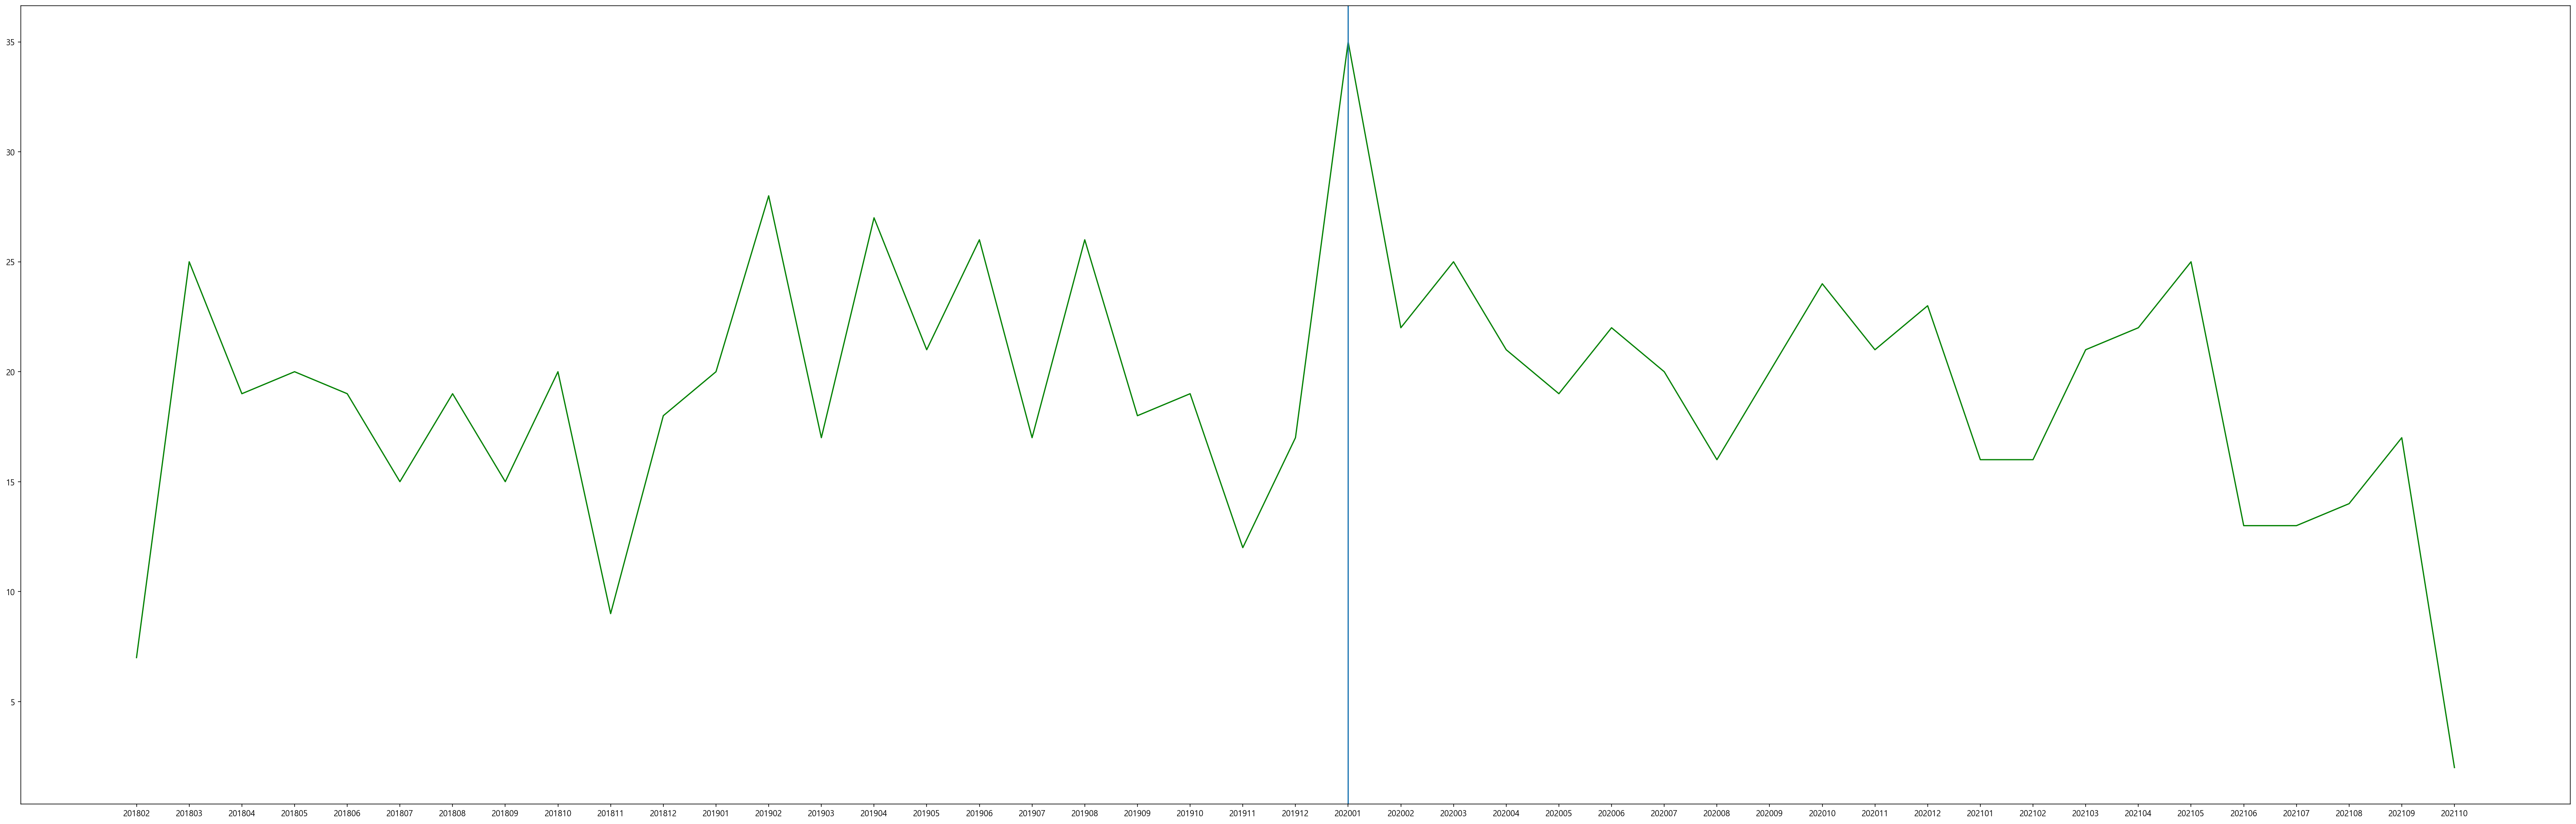

In [26]:
# 기간별 강남구의 경양식 폐업건수
plt.figure(figsize = (56, 18))

plt.plot(y_m, closed_group['경양식']['강남구'], 'g')
plt.axvline(x='202001')


In [27]:
# 폐업연월에 따른 지역별 총 폐업건수
closed_group_region = closed.groupby(['폐업연월', '지역(구)'])['사업장명'].count().unstack().fillna(0)
closed_group_region

# (기간별 폐업점포수 / 기간별 배달건수)를 지역구마다 구하면 유의미한 결과를 얻을 수 있을 것 같음
# -> 아직 데이터가 없음

지역(구),강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
폐업연월,,,,,,,,,,,,,,,,,,,,,
201802,24.0,6.0,5.0,8.0,20.0,12.0,12.0,11.0,4.0,6.0,...,12.0,12.0,21.0,7.0,13.0,6.0,5.0,10.0,18.0,5.0
201803,111.0,37.0,22.0,32.0,32.0,31.0,36.0,21.0,46.0,20.0,...,28.0,22.0,68.0,27.0,39.0,36.0,25.0,30.0,43.0,42.0
201804,91.0,39.0,25.0,54.0,54.0,46.0,28.0,28.0,29.0,23.0,...,18.0,35.0,66.0,31.0,56.0,36.0,28.0,41.0,35.0,25.0
201805,100.0,49.0,28.0,38.0,49.0,48.0,39.0,32.0,17.0,16.0,...,30.0,27.0,80.0,25.0,36.0,26.0,407.0,31.0,27.0,20.0
201806,105.0,39.0,25.0,48.0,34.0,34.0,25.0,30.0,27.0,19.0,...,19.0,26.0,67.0,26.0,49.0,42.0,34.0,22.0,34.0,29.0
201807,74.0,32.0,22.0,38.0,51.0,34.0,19.0,24.0,25.0,14.0,...,17.0,26.0,75.0,21.0,37.0,36.0,38.0,25.0,28.0,24.0
201808,95.0,50.0,21.0,38.0,31.0,41.0,30.0,22.0,20.0,14.0,...,21.0,35.0,43.0,30.0,34.0,32.0,40.0,32.0,32.0,26.0
201809,68.0,13.0,17.0,42.0,27.0,23.0,17.0,23.0,11.0,18.0,...,20.0,19.0,52.0,17.0,31.0,38.0,29.0,30.0,26.0,16.0
201810,93.0,47.0,36.0,42.0,42.0,25.0,49.0,20.0,27.0,25.0,...,32.0,24.0,61.0,55.0,53.0,20.0,27.0,66.0,37.0,25.0


In [28]:
# 지역구별 폐업한 업종 수 그룹화
closed_group_categories = closed.groupby(['업태구분명', '지역(구)'])['지번주소'].count().unstack().fillna(0)
closed_group_categories

지역(구),강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
업태구분명,,,,,,,,,,,,,,,,,,,,,
감성주점,25.0,3.0,1.0,0.0,6.0,0.0,2.0,0.0,8.0,1.0,...,0.0,0.0,4.0,0.0,3.0,5.0,2.0,0.0,1.0,0.0
경양식,861.0,54.0,35.0,164.0,158.0,104.0,49.0,34.0,45.0,39.0,...,109.0,78.0,123.0,39.0,108.0,259.0,79.0,224.0,125.0,24.0
기타,697.0,173.0,207.0,70.0,98.0,129.0,154.0,78.0,160.0,52.0,...,170.0,246.0,681.0,223.0,227.0,422.0,237.0,236.0,184.0,83.0
기타 휴게음식점,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
김밥(도시락),54.0,11.0,8.0,4.0,13.0,15.0,5.0,3.0,4.0,8.0,...,8.0,10.0,14.0,10.0,14.0,7.0,3.0,3.0,8.0,2.0
까페,87.0,26.0,52.0,2.0,34.0,51.0,14.0,18.0,31.0,26.0,...,17.0,50.0,50.0,22.0,56.0,58.0,13.0,22.0,48.0,3.0
냉면집,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
다방,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
라이브카페,9.0,3.0,0.0,3.0,4.0,3.0,1.0,3.0,5.0,3.0,...,0.0,0.0,4.0,1.0,4.0,0.0,2.0,0.0,1.0,0.0


#### 2) 개업중인 상점 데이터 분석

In [29]:
opening = df[df['상세영업상태명'] != '폐업']
opening = opening.drop(opening.columns[0:7], axis = 1)
opening = opening.drop(opening.columns[25:43], axis = 1)

In [30]:
opening = opening.drop(columns = ['휴업시작일자', '휴업종료일자', '재개업일자', '전화번호', '도로명주소', '소재지우편번호', '도로명우편번호', '최종수정일자', '데이터갱신구분', '데이터갱신일자'], axis = 1)
opening

,상세영업상태명,폐업일자,소재지면적,지번주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,총인원
0,영업,NaN,NaN,서울특별시 종로구 신문로1가 166-2번지,일식동경,일식,NaN,NaN,일식,0.0,0.0,기타,우수,NaN,NaN
1,영업,NaN,NaN,서울특별시 종로구 관철동 5-12번지,상해,분식,198867.702591,451824.281126,분식,0.0,0.0,기타,기타,NaN,NaN
2,영업,NaN,55.71,서울특별시 관악구 신림동 1638-20번지,미쿠,일식,193687.348199,442284.164025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,영업,NaN,15.40,서울특별시 강남구 역삼동 603-4번지,강박사 쌈밥,한식,202557.373783,444807.337686,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,영업,NaN,NaN,서울특별시 종로구 창신동 583-95번지 외1필지 (지상1층),짱구,분식,200883.062629,452530.632630,분식,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468825,영업,NaN,52.80,서울특별시 성북구 안암동5가 103-88,1973 먹거리장터 광장시장,정종/대포집/소주방,202556.343294,453584.914291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468827,영업,NaN,83.58,서울특별시 성북구 정릉동 227-72 명성맨션 101호102호,전가네해물찜,호프/통닭,201212.068686,456444.377306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468829,영업,NaN,54.63,서울특별시 종로구 종로6가 130-1,마포생소금구이,분식,200535.321541,452164.664229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468831,영업,NaN,63.44,서울특별시 영등포구 당산동3가 228-12 (2층),왕징중화요리,호프/통닭,190847.641438,447125.549590,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
opening = opening.drop(columns = ['폐업일자', '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총인원'], axis = 1)
opening

,상세영업상태명,소재지면적,지번주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y)
0,영업,NaN,서울특별시 종로구 신문로1가 166-2번지,일식동경,일식,NaN,NaN
1,영업,NaN,서울특별시 종로구 관철동 5-12번지,상해,분식,198867.702591,451824.281126
2,영업,55.71,서울특별시 관악구 신림동 1638-20번지,미쿠,일식,193687.348199,442284.164025
3,영업,15.40,서울특별시 강남구 역삼동 603-4번지,강박사 쌈밥,한식,202557.373783,444807.337686
4,영업,NaN,서울특별시 종로구 창신동 583-95번지 외1필지 (지상1층),짱구,분식,200883.062629,452530.632630
...,...,...,...,...,...,...,...
468825,영업,52.80,서울특별시 성북구 안암동5가 103-88,1973 먹거리장터 광장시장,정종/대포집/소주방,202556.343294,453584.914291
468827,영업,83.58,서울특별시 성북구 정릉동 227-72 명성맨션 101호102호,전가네해물찜,호프/통닭,201212.068686,456444.377306
468829,영업,54.63,서울특별시 종로구 종로6가 130-1,마포생소금구이,분식,200535.321541,452164.664229
468831,영업,63.44,서울특별시 영등포구 당산동3가 228-12 (2층),왕징중화요리,호프/통닭,190847.641438,447125.549590


In [32]:
opening = opening.dropna(subset = ['지번주소'])
opening['지역(구)'] = opening['지번주소'].apply(goo)
opening

,상세영업상태명,소재지면적,지번주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),지역(구)
0,영업,NaN,서울특별시 종로구 신문로1가 166-2번지,일식동경,일식,NaN,NaN,종로구
1,영업,NaN,서울특별시 종로구 관철동 5-12번지,상해,분식,198867.702591,451824.281126,종로구
2,영업,55.71,서울특별시 관악구 신림동 1638-20번지,미쿠,일식,193687.348199,442284.164025,관악구
3,영업,15.40,서울특별시 강남구 역삼동 603-4번지,강박사 쌈밥,한식,202557.373783,444807.337686,강남구
4,영업,NaN,서울특별시 종로구 창신동 583-95번지 외1필지 (지상1층),짱구,분식,200883.062629,452530.632630,종로구
...,...,...,...,...,...,...,...,...
468825,영업,52.80,서울특별시 성북구 안암동5가 103-88,1973 먹거리장터 광장시장,정종/대포집/소주방,202556.343294,453584.914291,성북구
468827,영업,83.58,서울특별시 성북구 정릉동 227-72 명성맨션 101호102호,전가네해물찜,호프/통닭,201212.068686,456444.377306,성북구
468829,영업,54.63,서울특별시 종로구 종로6가 130-1,마포생소금구이,분식,200535.321541,452164.664229,종로구
468831,영업,63.44,서울특별시 영등포구 당산동3가 228-12 (2층),왕징중화요리,호프/통닭,190847.641438,447125.549590,영등포구


In [33]:
opening_group = opening.groupby(['업태구분명','지역(구)'])['지번주소'].count().unstack().fillna(0)
opening_group
# 지역구별 현재 영업중인 업태 수 그룹화

지역(구),강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
업태구분명,,,,,,,,,,,,,,,,,,,,,
감성주점,54.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,63.0,1.0,...,1.0,3.0,16.0,7.0,8.0,7.0,0.0,11.0,22.0,1.0
경양식,2261.0,149.0,82.0,510.0,380.0,264.0,92.0,76.0,127.0,88.0,...,309.0,172.0,333.0,80.0,336.0,796.0,128.0,973.0,566.0,70.0
기타,1483.0,404.0,544.0,215.0,325.0,355.0,322.0,230.0,444.0,152.0,...,664.0,764.0,1632.0,583.0,670.0,1016.0,477.0,1234.0,745.0,337.0
김밥(도시락),99.0,20.0,12.0,30.0,17.0,49.0,14.0,4.0,17.0,18.0,...,18.0,39.0,38.0,17.0,26.0,25.0,6.0,17.0,25.0,3.0
까페,129.0,45.0,85.0,11.0,49.0,136.0,27.0,30.0,48.0,30.0,...,60.0,99.0,88.0,62.0,95.0,110.0,23.0,89.0,156.0,55.0
냉면집,4.0,12.0,3.0,2.0,3.0,0.0,2.0,1.0,3.0,0.0,...,1.0,2.0,5.0,0.0,3.0,3.0,4.0,0.0,2.0,5.0
도매업(유통),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
라이브카페,22.0,10.0,4.0,9.0,7.0,11.0,4.0,7.0,13.0,5.0,...,0.0,2.0,10.0,1.0,10.0,2.0,1.0,1.0,14.0,4.0
복어취급,4.0,0.0,1.0,4.0,0.0,0.0,5.0,0.0,2.0,0.0,...,0.0,1.0,3.0,2.0,3.0,2.0,0.0,1.0,1.0,1.0


In [34]:
set(pd.unique(closed['업태구분명'])) - set(pd.unique(opening['업태구분명']))


{'기타 휴게음식점', '다방', '룸살롱', '식품등 수입판매업'}

In [49]:
closed_group.to_csv('closed_group')